In [105]:
import numpy as np 
import pandas as pd 
import os 
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns 
color_palette = sns.color_palette("plasma")

from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import dbscan
from sklearn.datasets import *
import hdbscan

from astropy import wcs
from astropy.stats import mad_stds
from photutils import DAOStarFinder
from astropy.io import fits
from photutils import *
from astropy.coordinates import Angle, SkyCoord
from isochrones.mist import MIST_Isochrone
from isochrones.dartmouth import Dartmouth_Isochrone

iso = MIST_Isochrone(bands=['B','V'])
iso_DARTH = Dartmouth_Isochrone(bands = ['B', 'V'])

In [3]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

In [3]:
# - loading data files - 

file_list = sorted(glob.glob('*.txt')); print(file_list)

['Berkeley20.txt', 'Berkeley34.txt', 'NGC2129.txt', 'king1.txt', 'king15.txt', 'stock18.txt']


# Berkeley 20

0.28 +- 0.09


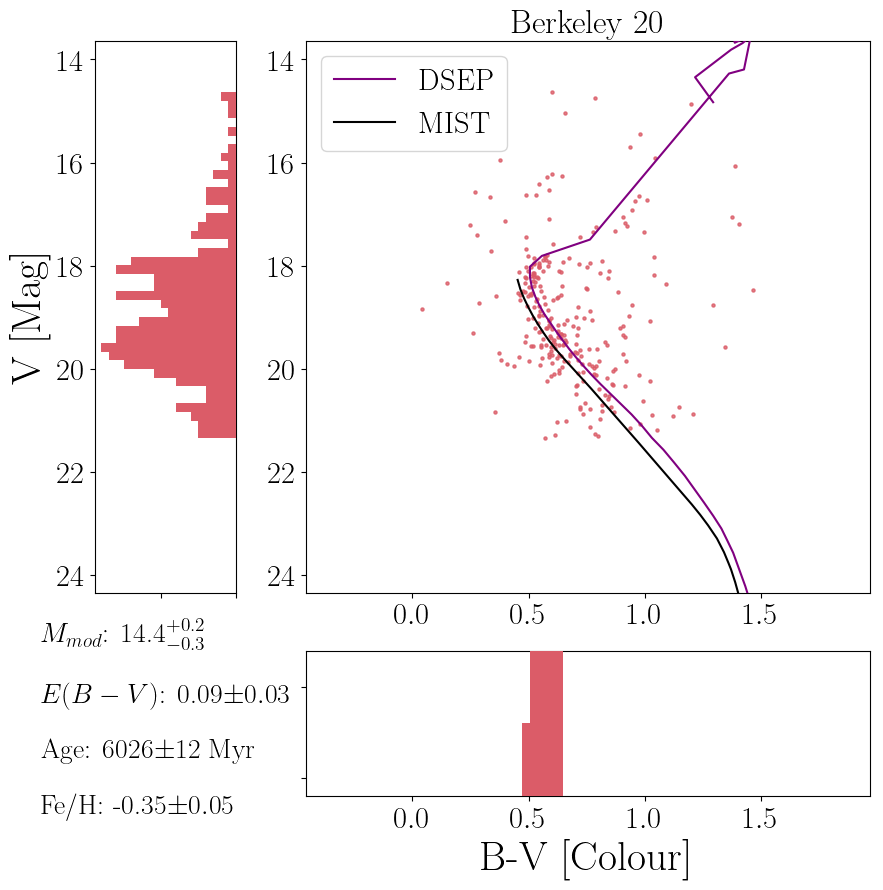

In [7]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('Berkeley20.txt', usecols = (2, 3), unpack = True, skiprows=1)


# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 5





# - Intialising and Fitting Isochrone 
color_excess = 0.09
extinction = 3.1*color_excess
color_err = 0.03

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 14.4
age_v = 9.78
feh_v = -0.35

isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.8, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()

pad = -1.6
annotate_font = 20

main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$^{+0.2}_{-0.3}$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.03$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 12$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.05$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)

main_ax.set_title('Berkeley 20', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()
main_ax.legend()


# main_ax.axes.yaxis.set_ticklabels([])

x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
plt.ylim(14, 22)
plt.savefig('plots/Berkeley20.pdf')
plt.show()

# Berkeley 34

1.55 +- 1.33


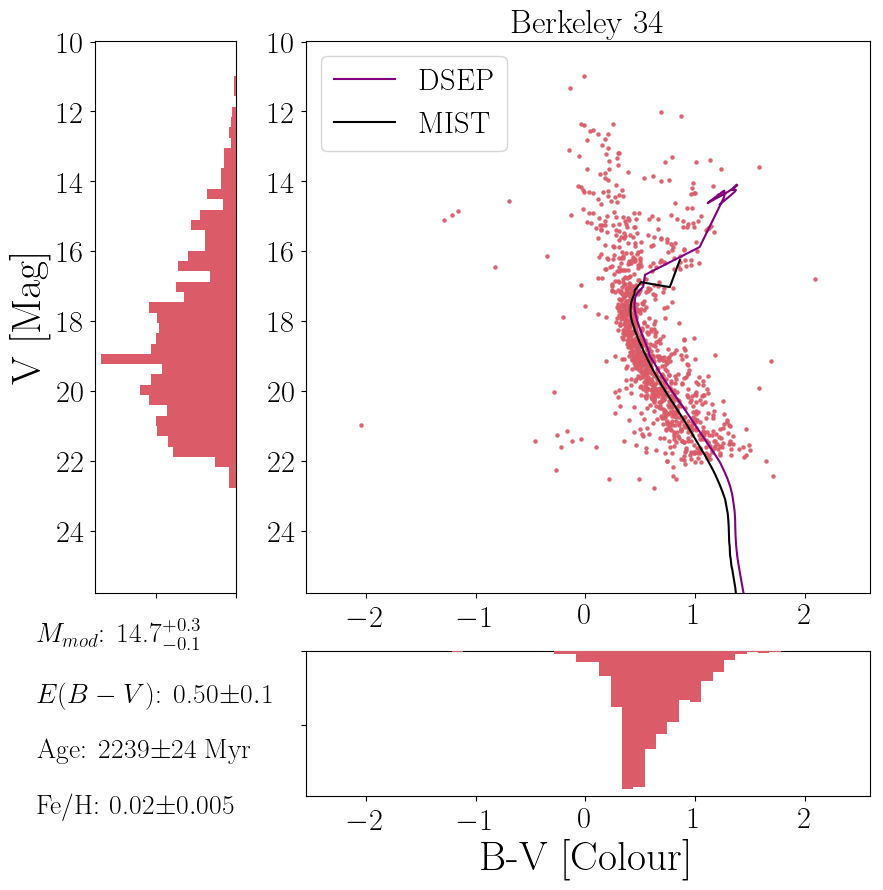

1106


In [5]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('Berkeley34.txt', usecols = (2, 3), unpack = True, skiprows=1)


# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 5


# - Intialising and Fitting Isochrone 


color_excess = 0.5
extinction = 3.1*color_excess
color_err = 0.43

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 14.68
age_v = 9.35
feh_v = 0.02

isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.9, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()

main_ax.set_title('Berkeley 34', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()

pad = -5
annotate_font = 20

main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$^{+0.3}_{-0.1}$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.1$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 24$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.005$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)

# main_ax.axes.yaxis.set_ticklabels([])
main_ax.legend()
x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
# plt.tight_layout()
plt.savefig('plots/Berkeley34.pdf')
plt.show()


print(len(webda_BV))

# King 1 

2.21 +- 2.11


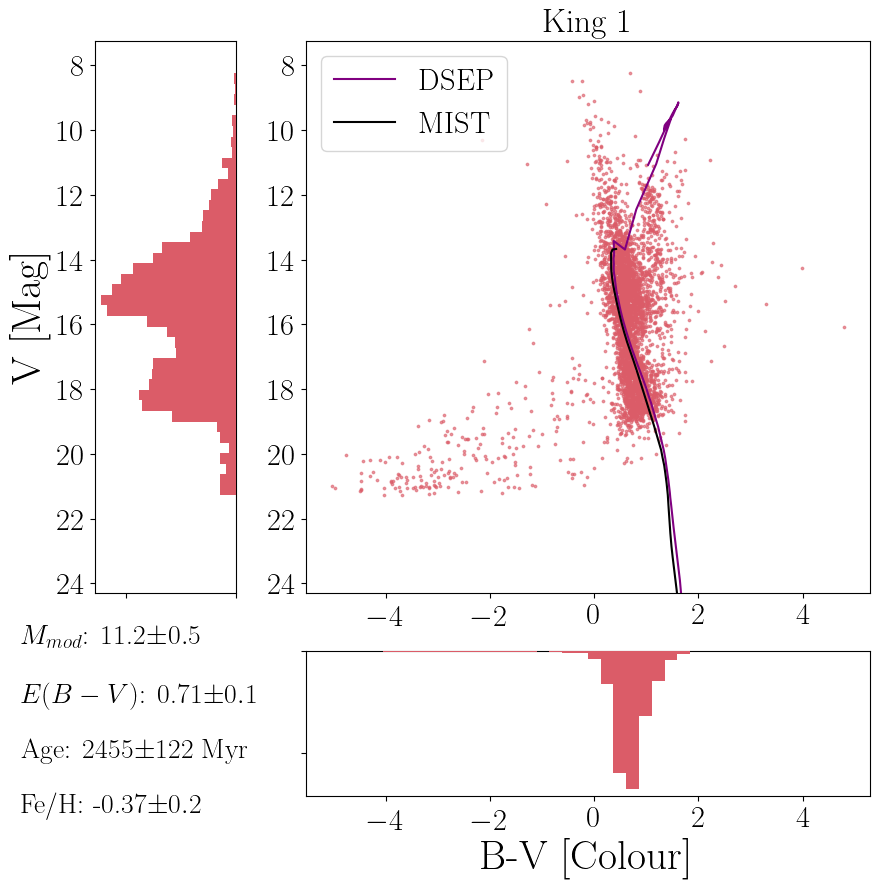

In [103]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('king1.txt', usecols = (2, 3), unpack = True, skiprows=1)


# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 3

# - Intialising and Fitting Isochrone 

color_excess = 0.712
extinction = 3.1*color_excess
color_err = 0.68 

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 11.17
age_v = 9.39
feh_v = -0.37

isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

pad = -11
annotate_font = 20

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.6, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()



main_ax.set_title('King 1', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()


main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$\pm 0.5$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.1$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 122$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.2$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.legend()

# main_ax.axes.yaxis.set_ticklabels([])

x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
# plt.tight_layout()
plt.savefig('plots/King1.pdf')
plt.show()

# King 15

1.86 +- 2.05


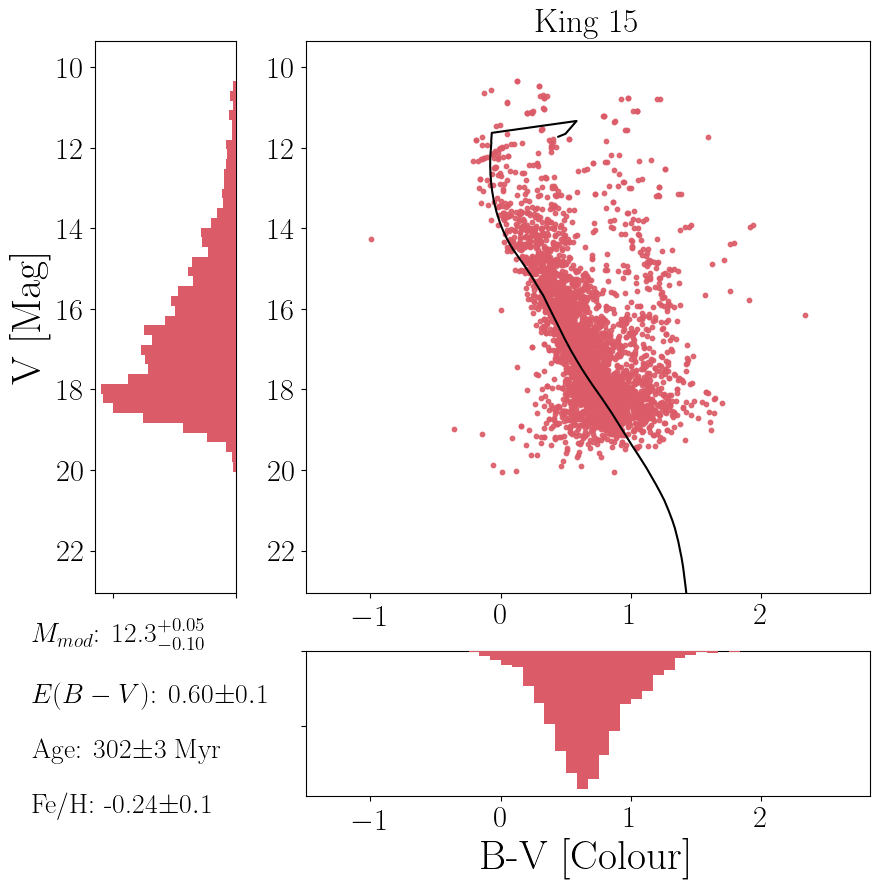

In [97]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('king15.txt', usecols = (2, 3), unpack = True, skiprows=1)


# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 10

# - Intialising and Fitting Isochrone 

color_excess = 0.6
extinction = 3.1*color_excess
color_err = 0.66 

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 12.29
age_v = 8.48
feh_v = -0.24

# isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
# modelv = isochrone['V_mag'] + distance
# modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
# main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.9, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()

pad = -3.6
annotate_font = 20


main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$^{+0.05}_{-0.10}$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.1$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 3$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.1$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)

main_ax.set_title('King 15', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()
# main_ax.legend()

# main_ax.axes.yaxis.set_ticklabels([])

x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
# plt.tight_layout()
plt.savefig('plots/King15.pdf')
plt.show()

# NGC 2129

2.17 +- 2.05


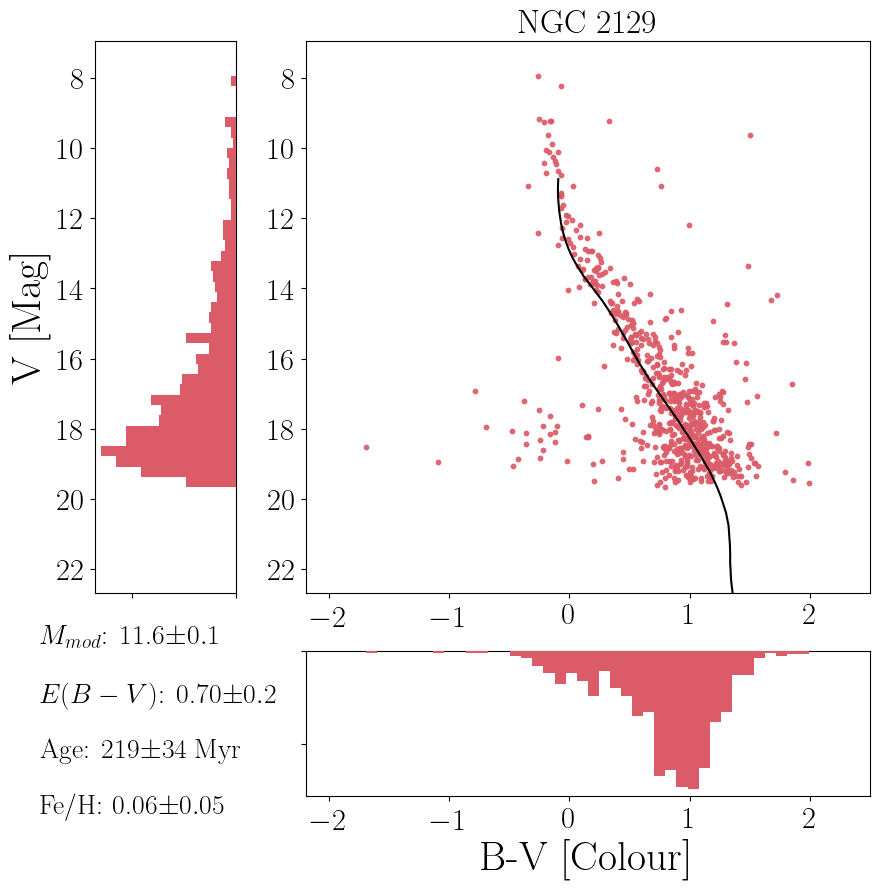

In [90]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('NGC2129.txt', usecols = (2, 3), unpack = True, skiprows=1)


# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 10

# - Intialising and Fitting Isochrone 

color_excess = 0.7
extinction = 3.1*color_excess
color_err = 0.66 

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 11.6
age_v = 8.34
feh_v = 0.06

isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.9, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()

pad = -4.4
annotate_font = 20


main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$\pm 0.1$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.2$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 34$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.05$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)

main_ax.set_title('NGC 2129', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()

# main_ax.axes.yaxis.set_ticklabels([])

x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
# plt.tight_layout()
plt.savefig('plots/NGC2129.pdf')
plt.show()

# Stock 18 

2.11 +- 0.00


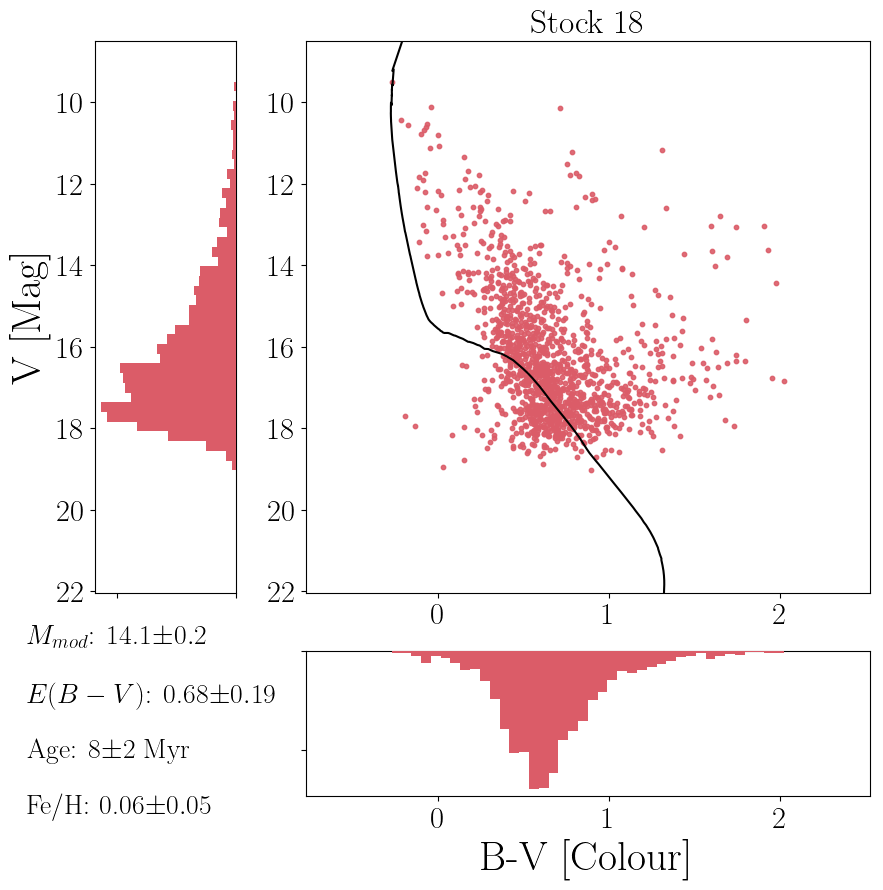

In [89]:
# --- Archived Data for the plot --- 
webda_V, webda_BV = np.loadtxt('stock18.txt', usecols = (2, 3), unpack = True, skiprows=1)

# - Setting up grid for multi-histogram plot -
fig = plt.figure(figsize=(10, 10), dpi = 100)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

dot_size = 10

# - Intialising and Fitting Isochrone 

color_excess = 0.68
extinction = 3.1*color_excess
color_err = 0.

print('{:.2f}'.format(extinction), '+-', '{:.2f}'.format(color_err/color_excess*extinction)) # - percentage error on extinction

webda_V = webda_V - extinction; webda_BV = webda_BV - color_excess

distance = 14.11
age_v = 6.88
feh_v = 0.06

# isochrone = iso_DARTH.isochrone(age = age_v, feh = feh_v)
# modelv = isochrone['V_mag'] + distance
# modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
# main_ax.plot(modelbv, modelv, color = 'purple', zorder = 4, label = 'DSEP')

isochrone = iso.isochrone(age = age_v, feh = feh_v)
modelv = isochrone['V_mag'] + distance
modelbv = (isochrone['B_mag'] - isochrone['V_mag'])
main_ax.plot(modelbv, modelv, color = 'k', zorder = 4, label = 'MIST')

# --- Main Plot --- 
main_ax.scatter(webda_BV, webda_V, color = color_palette[3], s=dot_size, alpha=0.9, zorder = 0) # - WEBDA Data 
x = webda_BV; y = webda_V

x_low, x_high = ((x.min() - 0.5), (x.max() + 0.5)); y_low, y_high = ((y.min() - 1), (y.max() + 3))

# - Sub-histogram Data Plot - 
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color=color_palette[3], zorder = 3)

x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color=color_palette[3], zorder = 3)

y_hist.invert_xaxis()

pad = -2.4
annotate_font = 20


main_ax.annotate(('$M_{mod}$: '+ '{:.1f}'.format(distance) + '$\pm 0.2$'), xy=(pad, -0.1), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('$E(B-V)$: '+ '{:.2f}'.format(color_excess) + '$\pm 0.19$'), xy=(pad, -0.2), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Age: '+ '{:.0f}'.format((10**age_v)/10**6) + '$\pm 2$ Myr'), xy=(pad, -0.3), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)
main_ax.annotate(('Fe/H: '+ str(feh_v) + '$\pm 0.05$'), xy=(pad, -0.4), xycoords=main_ax.get_xaxis_transform(), fontsize = annotate_font)

main_ax.set_title('Stock 18', fontsize = 24)
main_ax.set_xlim(x_low, x_high); main_ax.set_ylim(y_low, y_high)
main_ax.invert_yaxis()

# main_ax.axes.yaxis.set_ticklabels([])

x_hist.set_xlabel('B-V [Colour]')
y_hist.set_ylabel('V [Mag]')
# plt.tight_layout()
plt.savefig('plots/stock18.pdf')
plt.show()

In [104]:
err = 0.1
ex = 0.71

print(err*(3.1*ex))
print(3.1*ex)

(10**7.846/10**6)

0.22010000000000002
2.201


70.14552984199713